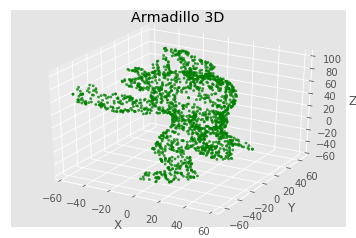

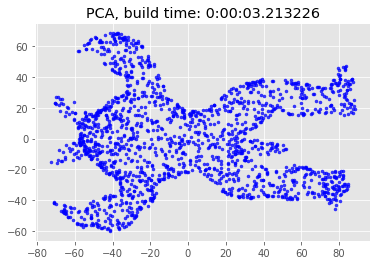

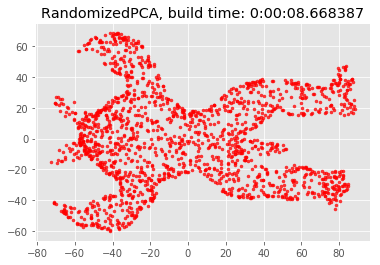

In [6]:
### Assignment1


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement


# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read('/Users/madushani/Google Drive/DataScience/DAT210x-master/Module4/Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})


def do_PCA(armadillo):
  #
  # TODO: Write code to import the libraries required for PCA.
  # Then, train your PCA on the armadillo dataframe. Finally,
  # drop one dimension (reduce it down to 2D) and project the
  # armadillo down to the 2D principal component feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # .. your code here ..
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, svd_solver='full')
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T


def do_RandomizedPCA(armadillo):
  #
  # TODO: Write code to import the libraries required for
  # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
  # dataframe. Finally, drop one dimension (reduce it down to 2D)
  # and project the armadillo down to the 2D principal component
  # feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and
  # not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # NOTE: SKLearn deprecated the RandomizedPCA method, but still
  # has instructions on how to use randomized (truncated) method
  # for the SVD solver. To find out how to use it, check out the
  # full docs here:
  # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  #
  # .. your code here ..
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, svd_solver='randomized')
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T




# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)



# Time the execution of PCA 5000x
# PCA is ran 5000x in order to help decrease the potential of rogue
# processes altering the speed of execution.
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)



# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


plt.show()



In [7]:
armadillo.head(5)

,x,y,z
0,27.283239,5.894578,11.788401
1,-56.153477,-54.866692,66.677132
2,-55.619434,-55.855236,67.534760
3,28.784435,23.476126,-31.522230
4,-54.396542,-49.803776,75.316780


bgr    float64
wc      object
rc      object
dtype: object
bgr    4.190491e+03
wc     9.715498e+06
rc     1.032527e+00
dtype: float64
              bgr            wc          rc
count  158.000000    158.000000  158.000000
mean   131.341772   8475.949367    4.891772
std     64.939832   3126.880181    1.019364
min     70.000000   3800.000000    2.100000
25%     97.000000   6525.000000    4.500000
50%    115.500000   7800.000000    4.950000
75%    131.750000   9775.000000    5.600000
max    490.000000  26400.000000    8.000000


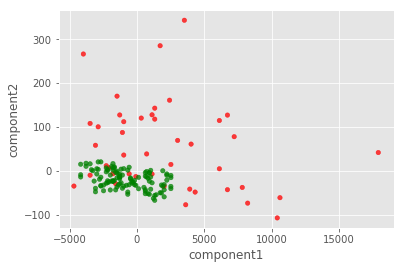

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')


# Do * NOT * alter this line, until instructed!
scaleFeatures = False


# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
# .. your code here ..
df = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module4/Datasets/kidney_disease.csv", index_col=0)
df = df.dropna()
df = df.reset_index(drop=True)


# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]


# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
dfnew = df[ ['bgr','wc','rc']]


# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
#
# .. your code here ..
print(dfnew.dtypes)

'df['wc'] = pd.to_numeric(df['wc'] , errors='coerce')
df['rc'] = pd.to_numeric(df['rc'] , errors='coerce')'
dfnew = df[ ['bgr','wc','rc']]

# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#
# .. your code here ..


import numpy as np
print(np.var(dfnew))
print(dfnew.describe())

# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)



# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(dfnew)
T = pca.transform(dfnew)


# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()




In [43]:
print(dfnew.dtypes)

bgr    float64
wc       int64
rc     float64
dtype: object


bgr    float64
wc      object
rc      object
dtype: object
New Variances:
 bgr    1.006369
wc     1.006369
rc     1.006369
dtype: float64
New Describe:
                 bgr            wc            rc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  9.345548e-17  1.068063e-16
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -1.500159e+00 -2.747446e+00
25%   -5.305059e-01 -6.259123e-01 -3.855519e-01
50%   -2.447210e-01 -2.168611e-01  5.730335e-02
75%    6.306235e-03  4.167672e-01  6.969831e-01
max    5.540492e+00  5.750474e+00  3.058878e+00
Features by importance:
 [(3.999807155688483, 'wc'), (3.258887664121087, 'bgr'), (3.009752752998363, 'rc')]


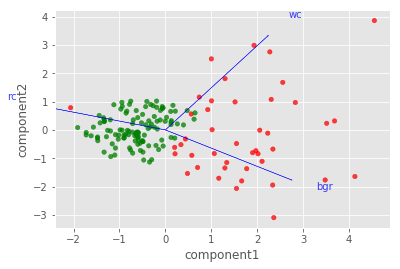

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')


# Do * NOT * alter this line, until instructed!
scaleFeatures = True


# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
# .. your code here ..
df1 = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module4/Datasets/kidney_disease.csv", index_col=0)
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)


# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df1.classification]


# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
df = df1[ ['bgr','wc','rc']]


# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
#
# .. your code here ..
print(df.dtypes)

df1['wc'] = pd.to_numeric(df1['wc'] , errors='coerce')
df1['rc'] = pd.to_numeric(df1['rc'] , errors='coerce')
df = df1[ ['bgr','wc','rc']]

# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#
# .. your code here ..


#import numpy as np
#print(np.var(df))
#print(df.describe())

# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)



# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)


# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()




In [57]:
 pca.components_

array([[ 0.60180443,  0.49016625, -0.63053032],
       [-0.45604187,  0.85904029,  0.23254161]])

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc        int64
rc      float64
dtype: object
New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.0063

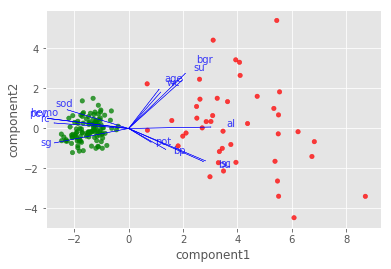

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')


# Do * NOT * alter this line, until instructed!
scaleFeatures = True


# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
# .. your code here ..
df1 = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module4/Datasets/kidney_disease.csv", index_col=0)
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)


# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df1.classification]


# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
#df = df1[ ['bgr','wc','rc']]


# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
#
# .. your code here ..
print(df1.dtypes)

df1['wc'] = pd.to_numeric(df1['wc'] , errors='coerce')
df1['rc'] = pd.to_numeric(df1['rc'] , errors='coerce')
norminal_features = [ 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
### Get rid of the norminal columns.
df = df1.drop(labels=norminal_features, axis=1)
print(df.dtypes)
exit() 

# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#
# .. your code here ..


#import numpy as np
#print(np.var(df))
#print(df.describe())

# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)



# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)


# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc         int64
rc       float64
htn       object
dm        obj

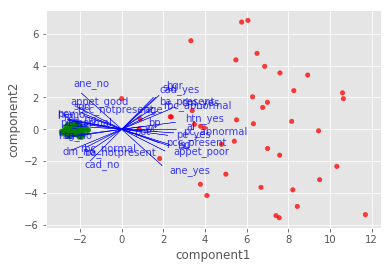

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')


# Do * NOT * alter this line, until instructed!
scaleFeatures = True


# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# QUESTION: Should the id column be included as a
# feature?
#
# .. your code here ..
df1 = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module4/Datasets/kidney_disease.csv", index_col=0)
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)


# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df1.classification]


# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
#df = df1[ ['bgr','wc','rc']]


# TODO: Print out and check your dataframe's dtypes. You'll might
# want to set a breakpoint after you print it out so you can stop the
# program's execution.
#
# You can either take a look at the dataset webpage in the attribute info
# section: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# or you can actually peek through the dataframe by printing a few rows.
# What kind of data type should these three columns be? If Pandas didn't
# properly detect and convert them to that data type for you, then use
# an appropriate command to coerce these features into the right type.
#
# .. your code here ..
print(df1.dtypes)

df1['wc'] = pd.to_numeric(df1['wc'] , errors='coerce')
df1['rc'] = pd.to_numeric(df1['rc'] , errors='coerce')

class_labels = [ 'classification']
### Get rid of the norminal columns.
df = df1.drop(labels=class_labels , axis=1)
print(df.dtypes)
 
### convert norminal features to boolean features    
norminal_features = [ 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']  
for features in norminal_features:
    df = pd.get_dummies(df,columns=[features])
    

# TODO: PCA Operates based on variance. The variable with the greatest
# variance will dominate. Go ahead and peek into your data using a
# command that will check the variance of every feature in your dataset.
# Print out the results. Also print out the results of running .describe
# on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then
# you probably didn't complete the previous step properly.
#
# .. your code here ..


#import numpy as np
#print(np.var(df))
#print(df.describe())

# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)



# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
T = pca.transform(df)


# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()
